In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
%cd '/content/gdrive/MyDrive/Example'
! ls

/content/gdrive/MyDrive/Example
1_MLP_Fashion_MNIST.ipynb      5_VGG16.ipynb
2_MLP_Cifar10.ipynb	       6_Cifar10_VGG16.ipynb
3_Classification_Models.ipynb  7_Custom_dataset_VGG16.ipynb
4_LeNet.ipynb		       Dataset


In [ ]:
# Libraries
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.layers import Convolution2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Dataset
train_path = '/content/gdrive/MyDrive/Example/Dataset/train'
valid_path = '/content/gdrive/MyDrive/Example/Dataset/valid'
test_path = '/content/gdrive/MyDrive/Example/Dataset/test'

In [ ]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

valid_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

# Flow training images in batches of 64 using train_datagen generator
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (28, 28),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

valid_set = valid_datagen.flow_from_directory(valid_path,
                                                 target_size = (28, 28),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (28, 28),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 240 images belonging to 3 classes.
Found 30 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [ ]:
# VGG16 model
model = Sequential()
model.add(Convolution2D(64, 3, padding='same', activation='relu', input_shape=(28,28,3)))
model.add(Convolution2D(64, 3, padding='same', activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Convolution2D(128, 3, padding='same', activation='relu'))
model.add(Convolution2D(128, 3, padding='same', activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

'''
model.add(Convolution2D(256, 3, padding='same', activation='relu'))
model.add(Convolution2D(256, 3, padding='same', activation='relu'))
model.add(Convolution2D(256, 3, padding='same', activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Convolution2D(512, 3, padding='same', activation='relu'))
model.add(Convolution2D(512, 3, padding='same', activation='relu'))
model.add(Convolution2D(512, 3, padding='same', activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))

model.add(Convolution2D(512, 3, padding='same', activation='relu'))
model.add(Convolution2D(512, 3, padding='same', activation='relu'))
model.add(Convolution2D(512, 3, padding='same', activation='relu'))
model.add(MaxPooling2D((2,2), strides=(2,2)))
'''

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(3, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 64)        36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                    

In [ ]:
# Tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Fit the model
history = model.fit(
  training_set,
  validation_data=valid_set,
  epochs=50
)

Epoch 1/50
4/4 [==============================] - 154s 33s/step - loss: 1.1743 - accuracy: 0.3083 - val_loss: 1.0978 - val_accuracy: 0.3333
Epoch 2/50
4/4 [==============================] - 1s 142ms/step - loss: 1.1061 - accuracy: 0.3333 - val_loss: 1.0982 - val_accuracy: 0.3333
Epoch 3/50
4/4 [==============================] - 1s 139ms/step - loss: 1.0981 - accuracy: 0.3333 - val_loss: 1.0976 - val_accuracy: 0.3333
Epoch 4/50
4/4 [==============================] - 1s 138ms/step - loss: 1.0984 - accuracy: 0.3250 - val_loss: 1.0971 - val_accuracy: 0.3333
Epoch 5/50
4/4 [==============================] - 1s 139ms/step - loss: 1.0992 - accuracy: 0.3583 - val_loss: 1.0960 - val_accuracy: 0.3667
Epoch 6/50
4/4 [==============================] - 1s 132ms/step - loss: 1.0969 - accuracy: 0.3375 - val_loss: 1.0927 - val_accuracy: 0.3333
Epoch 7/50
4/4 [==============================] - 1s 133ms/step - loss: 1.0982 - accuracy: 0.3333 - val_loss: 1.0892 - val_accuracy: 0.3667
Epoch 8/50
4/4 [====

In [ ]:
# Testing
score = model.evaluate(test_set, verbose=0)
print(f'Test loss: {score[0]:.4f}')
print(f'Test accuracy: {score[1]:.4f}')

Test loss: 0.2235
Test accuracy: 0.9333


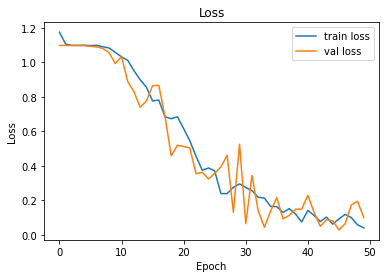

In [ ]:
# Loss
fig, axes = plt.subplots(1, 1, figsize=(6, 4))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title(label = 'Loss', fontsize = 12, color = "black")
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
#fig.savefig('loss')

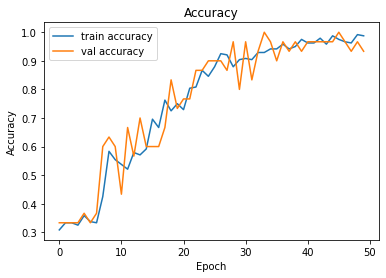

In [ ]:
# Accuracy
fig, axes = plt.subplots(1, 1, figsize=(6, 4))
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title(label = 'Accuracy', fontsize = 12, color = "black")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
#fig.savefig('accuracy')